# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(Pytorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [1]:
!pip install skorch

     |████████████████████████████████| 133kB 4.6MB/s 


In [2]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

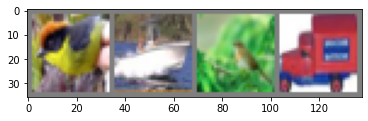

 bird  ship  bird truck


In [6]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [7]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self,input_size=3*32*32 ,hidden_size=200 ,num_classes=10):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super(TwolayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores


In [8]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, input_channels=3, num_classes=10):
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(input_channels, 6, 5)
        self.s2 = nn.AvgPool2d(2, stride=2)
        self.c3 = nn.Conv2d(6, 16, 5)
        self.s4 = nn.AvgPool2d(2, stride=2)
        self.c5 = nn.Linear(16*5*5, 120)
        self.f6 = nn.Linear(120, 84)
        self.output = nn.Linear(84, num_classes)
        
    def forward(self, x):
        x = F.tanh(self.c1(x))
        x = self.s2(x)
        x = F.tanh(self.c3(x))
        x = self.s4(x)
        x = x.view(-1, self.num_flat_features(x))
        x = F.tanh(self.c5(x))
        x = F.tanh(self.f6(x))
        x = F.sigmoid(self.output(x))
        return x
    
    def num_flat_features(self, x):
        # Function from pytorch tutorial
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [9]:
def train(net, trainloader, epoch=1, lr=0.001):
    ###################### Define Loss function and optimizer
    lossfunc = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr)
    loss_list = []
    net.train()
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 
        epoch_loss = 0
        for i, data in enumerate(trainloader):
#             print(i)
            inputs, labels = data
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = lossfunc(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                loss = epoch_loss / 2000
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss))
                loss_list.append(loss)
                epoch_loss = 0.0
    return loss_list
    print('Finished Training')

####  Train Two-layer Net

[1,  2000] loss: 2.084
[1,  4000] loss: 1.892
[1,  6000] loss: 1.803
[1,  8000] loss: 1.738
[1, 10000] loss: 1.733
[1, 12000] loss: 1.683
[2,  2000] loss: 1.627
[2,  4000] loss: 1.621
[2,  6000] loss: 1.605
[2,  8000] loss: 1.605
[2, 10000] loss: 1.591
[2, 12000] loss: 1.567
[3,  2000] loss: 1.546
[3,  4000] loss: 1.541
[3,  6000] loss: 1.530
[3,  8000] loss: 1.495
[3, 10000] loss: 1.502
[3, 12000] loss: 1.515
[4,  2000] loss: 1.461
[4,  4000] loss: 1.461
[4,  6000] loss: 1.482
[4,  8000] loss: 1.450
[4, 10000] loss: 1.465
[4, 12000] loss: 1.456
[5,  2000] loss: 1.421
[5,  4000] loss: 1.401
[5,  6000] loss: 1.425
[5,  8000] loss: 1.396
[5, 10000] loss: 1.439
[5, 12000] loss: 1.387
[6,  2000] loss: 1.368
[6,  4000] loss: 1.384
[6,  6000] loss: 1.364
[6,  8000] loss: 1.383
[6, 10000] loss: 1.359
[6, 12000] loss: 1.347
[7,  2000] loss: 1.322
[7,  4000] loss: 1.330
[7,  6000] loss: 1.352
[7,  8000] loss: 1.347
[7, 10000] loss: 1.314
[7, 12000] loss: 1.315
[8,  2000] loss: 1.267
[8,  4000] 

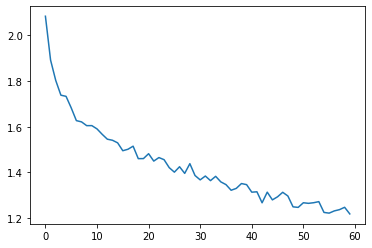

In [10]:
net = TwolayerNet()
losses = train(net, trainloader, epoch=10)
plt.plot(losses)
plt.show()

In [11]:
def valid(net,testloader, device = None):
    correct = 0
    total = 0
    with torch.no_grad():
         for data in testloader:
             images, labels = data
             if device is not None:
              images, labels = images.to(device), labels.to(device)
             outputs = net(images)
             _, predicted = torch.max(outputs.data, 1)
             total += labels.size(0)
             correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [12]:
def valid_class(net,testloader,classes, device = None):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            if device is not None:
              images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [13]:
valid(net,testloader)

Accuracy of the network on the 10000 test images: 51 %


In [14]:
valid_class(net,testloader,classes=[0,1,2,3,4,5,6,7,8,9])

Accuracy of     0 : 55 %
Accuracy of     1 : 54 %
Accuracy of     2 : 41 %
Accuracy of     3 : 42 %
Accuracy of     4 : 35 %
Accuracy of     5 : 33 %
Accuracy of     6 : 68 %
Accuracy of     7 : 51 %
Accuracy of     8 : 62 %
Accuracy of     9 : 68 %


#### Train ConvNet

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[1,  2000] loss: 2.265
[1,  4000] loss: 2.152
[1,  6000] loss: 2.119
[1,  8000] loss: 2.099
[1, 10000] loss: 2.087
[1, 12000] loss: 2.082
[2,  2000] loss: 2.063
[2,  4000] loss: 2.064
[2,  6000] loss: 2.055
[2,  8000] loss: 2.041
[2, 10000] loss: 2.035
[2, 12000] loss: 2.022
[3,  2000] loss: 2.013
[3,  4000] loss: 1.996
[3,  6000] loss: 1.994
[3,  8000] loss: 1.985
[3, 10000] loss: 1.977
[3, 12000] loss: 1.968
[4,  2000] loss: 1.965
[4,  4000] loss: 1.945
[4,  6000] loss: 1.950
[4,  8000] loss: 1.935
[4, 10000] loss: 1.927
[4, 12000] loss: 1.925
[5,  2000] loss: 1.914
[5,  4000] loss: 1.909
[5,  6000] loss: 1.910
[5,  8000] loss: 1.911
[5, 10000] loss: 1.904
[5, 12000] loss: 1.900
[6,  2000] loss: 1.890
[6,  4000] loss: 1.896
[6,  6000] loss: 1.886
[6,  8000] loss: 1.891
[6, 10000] loss: 1.887
[6, 12000] loss: 1.882
[7,  2000] loss: 1.879
[7,  4000] loss: 1.875
[7,  6000] loss: 1.871
[7,  8000] loss: 1.874
[7, 10000] loss: 1.874
[7, 12000] loss: 1.870
[8,  2000] loss: 1.863
[8,  4000] 

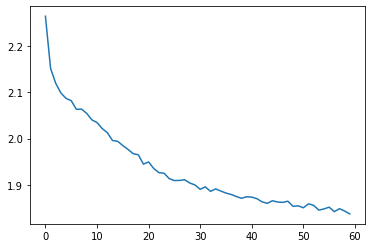

In [15]:
net = ConvNet()
losses = train(net, trainloader, epoch=10, lr=0.01)
plt.plot(losses)
plt.show()

In [16]:
valid(net,testloader)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 10000 test images: 48 %


In [17]:
valid_class(net,testloader,classes=[0,1,2,3,4,5,6,7,8,9])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of     0 : 49 %
Accuracy of     1 : 60 %
Accuracy of     2 : 41 %
Accuracy of     3 : 40 %
Accuracy of     4 : 43 %
Accuracy of     5 : 30 %
Accuracy of     6 : 58 %
Accuracy of     7 : 55 %
Accuracy of     8 : 48 %
Accuracy of     9 : 55 %


####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [18]:
###  suggested reference: https://pytorch.org/tutorials/
# recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image
from torch.utils.data import Dataset, DataLoader
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        mydict = pickle.load(fo, encoding='bytes')
    return mydict

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        
        ################################
        # Todo: finish the code
        ################################
        self.data = list()
        self.labels = list()
        self.transform = transform
        # Load data
        if train:
            for i in range(1,6):
                path = root + f'data_batch_{i}'
                mydict = unpickle(path)
                for i in range(len(mydict[b'data'])):
                    self.data.append(mydict[b'data'][i].reshape(3,32,32))
                self.labels = [*self.labels, mydict[b'labels']]
            self.data = np.array(self.data)
            self.labels = np.array(self.labels)
            self.labels = np.reshape(self.labels, (1,-1))
            #self.data = self.data/255
            #self.data = self.data.astype(np.float32)
            self.max_labels = np.max(self.labels)
        else:
            path = root + 'test_batch'
            mydict = unpickle(path)
            self.data = mydict[b'data']
            self.labels = mydict[b'labels']
            self.data = np.reshape(self.data, (-1,3,32,32))
            self.labels = np.array(self.labels)
            self.labels = np.reshape(self.labels, (1,-1))
            #self.data /= 255
            #self.data = self.data.astype(np.float32)
            self.max_labels = np.max(self.labels)
        
       
    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        label = self.labels[0,item]
        img = self.data[item]
        #img = np.reshape(img, (3,32,32))
        target = np.zeros(self.max_labels)
        target[label-1] = 1
        img = np.transpose(img,(1,2,0))
        if transform is not None:
            img = self.transform(img)
        return img, label

In [19]:
cif10 = CIFAR10_loader(root='./data/cifar-10-batches-py/', transform = transforms.ToTensor(), train = True)
cif10[4][0].shape

torch.Size([3, 32, 32])

#### *` Complement Transform function and Optimizer`*

In [20]:
# cif10 = CIFAR10_loader(root='./data/cifar-10-batches-py/')

class Normaliser():
  def __init__(self, mean, std):
    self.mean = mean
    self.std = std

  def __call__(self, tensor):
    if not torch.is_tensor(tensor):
        raise TypeError('tensor should be a torch tensor. Got {}.'.format(type(tensor)))
    dtype = tensor.dtype
    mean = torch.as_tensor(self.mean, dtype=dtype)
    std = torch.as_tensor(self.std, dtype=dtype)
    if mean.ndim == 1:
       mean = mean[:, None, None]
    if std.ndim == 1:
       std = std[:, None, None]
    tensor.sub_(mean).div_(std)
    return tensor

transform_aug_train =  transforms.Compose(
    [transforms.ToPILImage(),
     transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     Normaliser(mean = 0.5, std = 0.5)])

transform_aug_test = transforms.Compose(
    [transforms.ToTensor(),
     Normaliser(mean = 0.5, std = 0.5)])

class MyOptimizer(optim.Optimizer):
    def __init__(self, parameters, lr):
        self.lr = lr
        self.parameters = parameters
        defaults = dict(lr=lr)
        super(MyOptimizer, self).__init__(parameters, defaults)
    
    def step(self):
        for group in self.param_groups:
            for p in group['params']:
                p_grad = p.grad
                if p_grad is None:
                    continue
                with torch.no_grad():
                    p.add_(p_grad, alpha=-self.lr) 
    
transform_train = transform_aug_train

transform_test = transform_aug_test

optimizer = MyOptimizer

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [21]:
def custom_train(net, trainloader, epoch=1, lr=0.001, device = None):
    ###################### Define Loss function and optimizer
    lossfunc = nn.CrossEntropyLoss()
    optimizer = MyOptimizer(net.parameters(), lr=lr)
    # optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    loss_list = []
    net.to(device)
    for epoch in range(epoch):  # loop over the dataset multiple times 
        epoch_loss = 0
        for i, data in enumerate(trainloader):
#             print(i)
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = lossfunc(outputs, labels)
            loss.backward()
            epoch_loss += loss.item()
            optimizer.step()
            
        loss_item = epoch_loss/(i+1)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, loss_item))
        loss_list.append(loss_item)
    return loss_list

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [22]:
class ConvNet3(nn.Module):
    def __init__(self):
        super(ConvNet3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=48, kernel_size=(3,3), padding=(1,1))
        self.conv2 = nn.Conv2d(in_channels=48, out_channels=96, kernel_size=(3,3), padding=(1,1))
        self.pool1 = nn.MaxPool2d(2,2)
        self.Dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(in_channels=96, out_channels=192, kernel_size=(3,3), padding=(1,1))
        self.conv4 = nn.Conv2d(in_channels=192, out_channels=256, kernel_size=(3,3), padding=(1,1))
        self.pool2 = nn.MaxPool2d(2,2)
        self.Dropout2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(in_features=8*8*256, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=64)
        self.Dropout3 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x)) #32*32*48
        x = F.relu(self.conv2(x)) #32*32*96
        x = self.pool1(x) #16*16*96
        x = self.Dropout1(x)
        x = F.relu(self.conv3(x)) #16*16*192
        x = F.relu(self.conv4(x)) #16*16*256
        x = self.pool2(x) # 8*8*256
        x = self.Dropout2(x)
        x = x.view(-1, 8*8*256) # reshape x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.Dropout3(x)
        x = self.fc3(x)
        return x
    
    def sub_forward(self, x):
      """Partial forward method used for feature visualization."""
      x = F.relu(self.conv1(x)) #32*32*48
      x = F.relu(self.conv2(x)) #32*32*96
      x = self.pool1(x) #16*16*96
      x = self.Dropout1(x)
      x = F.relu(self.conv3(x)) #16*16*192
      x = F.relu(self.conv4(x)) #16*16*256
      x = self.pool2(x) # 8*8*256
      x = self.Dropout2(x)
      x = x.view(-1, 8*8*256) # reshape x
      return x

Epoch: 1 	Training Loss: 2.302186
Epoch: 2 	Training Loss: 2.224875
Epoch: 3 	Training Loss: 1.977861
Epoch: 4 	Training Loss: 1.839588
Epoch: 5 	Training Loss: 1.751021
Epoch: 6 	Training Loss: 1.677018
Epoch: 7 	Training Loss: 1.604264
Epoch: 8 	Training Loss: 1.536350
Epoch: 9 	Training Loss: 1.480898
Epoch: 10 	Training Loss: 1.428827
Epoch: 11 	Training Loss: 1.375613
Epoch: 12 	Training Loss: 1.335796
Epoch: 13 	Training Loss: 1.290489
Epoch: 14 	Training Loss: 1.244280
Epoch: 15 	Training Loss: 1.202111
Epoch: 16 	Training Loss: 1.150473
Epoch: 17 	Training Loss: 1.111535
Epoch: 18 	Training Loss: 1.068668
Epoch: 19 	Training Loss: 1.033199
Epoch: 20 	Training Loss: 0.997986
Epoch: 21 	Training Loss: 0.962236
Epoch: 22 	Training Loss: 0.928728
Epoch: 23 	Training Loss: 0.905392
Epoch: 24 	Training Loss: 0.873105
Epoch: 25 	Training Loss: 0.848084
Epoch: 26 	Training Loss: 0.823142
Epoch: 27 	Training Loss: 0.800107
Epoch: 28 	Training Loss: 0.775560
Epoch: 29 	Training Loss: 0.7

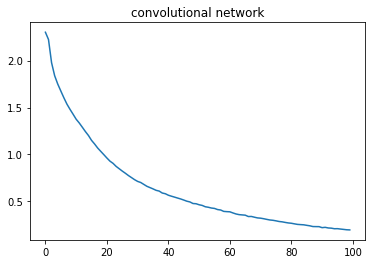

In [23]:
cif10 = CIFAR10_loader(root='./data/cifar-10-batches-py/', transform = transform_train, train = True)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform_train)
mytrainloader = DataLoader(cif10, batch_size = 50, shuffle = True, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
convnet = ConvNet3()
losses = custom_train(convnet, mytrainloader, epoch = 100, device = device, lr=0.01)
pre_tune_state_dict = convnet.state_dict()
plt.plot(losses)
plt.title('convolutional network')
plt.show()

Epoch: 1 	Training Loss: 2.023282
Epoch: 2 	Training Loss: 1.877319
Epoch: 3 	Training Loss: 1.809614
Epoch: 4 	Training Loss: 1.761117
Epoch: 5 	Training Loss: 1.723923
Epoch: 6 	Training Loss: 1.696286
Epoch: 7 	Training Loss: 1.670535
Epoch: 8 	Training Loss: 1.648315
Epoch: 9 	Training Loss: 1.633059
Epoch: 10 	Training Loss: 1.617762
Epoch: 11 	Training Loss: 1.603557
Epoch: 12 	Training Loss: 1.589755
Epoch: 13 	Training Loss: 1.577038
Epoch: 14 	Training Loss: 1.568236
Epoch: 15 	Training Loss: 1.558236
Epoch: 16 	Training Loss: 1.548442
Epoch: 17 	Training Loss: 1.540175
Epoch: 18 	Training Loss: 1.530923
Epoch: 19 	Training Loss: 1.518226
Epoch: 20 	Training Loss: 1.514534
Epoch: 21 	Training Loss: 1.504937
Epoch: 22 	Training Loss: 1.498218
Epoch: 23 	Training Loss: 1.492360
Epoch: 24 	Training Loss: 1.489467
Epoch: 25 	Training Loss: 1.481598
Epoch: 26 	Training Loss: 1.470950
Epoch: 27 	Training Loss: 1.470137
Epoch: 28 	Training Loss: 1.462248
Epoch: 29 	Training Loss: 1.4

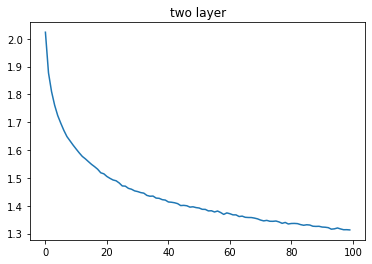

In [24]:
cif10 = CIFAR10_loader(root='./data/cifar-10-batches-py/', transform = transform_train, train = True)
mytrainloader = DataLoader(cif10, batch_size = 50, shuffle = True, num_workers=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = TwolayerNet()
losses = custom_train(net, mytrainloader, epoch=100, lr=0.005)
plt.plot(losses)
plt.title('two layer')
plt.show()

#### *` test the accuracy of TwolayerNet `*


In [25]:
################################
# Todo: finish the code
################################
cif10_test = CIFAR10_loader(root='./data/cifar-10-batches-py/', transform = transform_test, train = False)
mytestloader = DataLoader(cif10_test, batch_size = 50, shuffle = False, num_workers = 2)
valid(net,mytestloader)
valid_class(net,mytestloader, [0,1,2,3,4,5,6,7,8,9])

Accuracy of the network on the 10000 test images: 53 %
Accuracy of     0 : 66 %
Accuracy of     1 : 80 %
Accuracy of     2 : 35 %
Accuracy of     3 : 43 %
Accuracy of     4 : 34 %
Accuracy of     5 : 40 %
Accuracy of     6 : 62 %
Accuracy of     7 : 61 %
Accuracy of     8 : 69 %
Accuracy of     9 : 57 %


#### *`test the accuracy of ConvNet`*

In [26]:
################################
# Todo: finish the code
################################
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
cif10_test = CIFAR10_loader(root='./data/cifar-10-batches-py/', transform = transform_test, train = False)
mytestloader = DataLoader(cif10_test, batch_size = 50, shuffle = False, num_workers = 2)
valid(convnet, mytestloader, device=device)
valid_class(convnet, mytestloader, [0,1,2,3,4,5,6,7,8,9], device=device)

Accuracy of the network on the 10000 test images: 84 %
Accuracy of     0 : 88 %
Accuracy of     1 : 83 %
Accuracy of     2 : 74 %
Accuracy of     3 : 69 %
Accuracy of     4 : 82 %
Accuracy of     5 : 77 %
Accuracy of     6 : 91 %
Accuracy of     7 : 85 %
Accuracy of     8 : 95 %
Accuracy of     9 : 93 %


## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 4 , which
contains the images of 10 different object categories, each of which has 32 ∗ 32 ∗ 3
dimensions. The dataset we use throughout the assignment is a subset of STL-10 5
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [27]:
#from stl10_data import *
from torch.utils.data import Dataset, DataLoader
class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        # Todo: finish the code
        ################################
        self.data = list()
        self.labels = list()
        self.transform = transform
        if train:
           path_to_data = root + 'train_X.bin'
           path_to_labels = root + 'train_y.bin'
           with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
                everything = np.fromfile(f, dtype=np.uint8)
                images = np.reshape(everything, (-1, 3, 96, 96))
           with open(path_to_labels, 'rb') as f:
                labels = np.fromfile(f, dtype=np.uint8)

           for i, image in enumerate(images):
               label = labels[i]
               if label in [1, 2, 9, 4, 6]:
                   self.data.append(image)
                   if label == 9:
                      self.labels.append(2)
                   elif label == 6:
                      self.labels.append(4)
                   elif label == 1:
                      self.labels.append(0)
                   elif label == 2:
                      self.labels.append(1)
                   elif label == 4:
                      self.labels.append(3)
           self.data = np.reshape(self.data, (-1, 3, 96, 96))  
           self.labels =  np.reshape(self.labels, (1,-1))
        else:
           path_to_data = root + 'test_X.bin'
           path_to_labels = root + 'test_y.bin'
           with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
                everything = np.fromfile(f, dtype=np.uint8)
                images = np.reshape(everything, (-1, 3, 96, 96))
           with open(path_to_labels, 'rb') as f:
                labels = np.fromfile(f, dtype=np.uint8)

           for i, image in enumerate(images):
               label = labels[i]
               if label in [1, 2, 9, 4, 6]:
                   self.data.append(image)
                   if label == 9:
                      self.labels.append(2)
                   elif label == 6:
                      self.labels.append(4)
                   elif label == 1:
                      self.labels.append(0)
                   elif label == 2:
                      self.labels.append(1)
                   elif label == 4:
                      self.labels.append(3)
           self.data = np.reshape(self.data, (-1, 3, 96, 96))  
           self.labels =  np.reshape(self.labels, (1,-1))          
  
    def __len__(self):
        ################################
        # Todo: finish the code
        ################################
        return len(self.data)

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################
        label = self.labels[0,item]
        img = self.data[item]
        img = np.reshape(img, (3,96,96))
        img = np.transpose(img,(1,2,0))
        if transform is not None:
            img = self.transform(img)
        return img, label


In [28]:

transform_aug_train_stl =  transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize(32),
     transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     Normaliser(mean = 0.5, std = 0.5)])
    

transform_aug_test_stl = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize(32),
     transforms.ToTensor(),
     Normaliser(mean = 0.5, std = 0.5)])

transform_train_stl = transform_aug_train_stl
transform_test_stl = transform_aug_test_stl

#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [29]:
################################
# Todo: finish the code
################################


def finetune(net, trainloader, lr, epochs, device = None):
    num_ftr = net.fc2.in_features
    ct=0
    for layer in ConvNet().children():
        ct+=1
    if ct<10:
        for param in  layer.parameters():
            param.requires_grad = False
    net.fc2 = nn.Linear(num_ftr, 128 )
    net.Dropout3 = nn.Dropout(0.3)
    net.fc3 = nn.Linear(128, 5)
    optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)
    exp_lr_scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones = [4,10], gamma=0.5)
    lossfunc = nn.CrossEntropyLoss()
    loss_list = []
    if device is not None:
      net.to(device)
    for epoch in range(epochs):  # loop over the dataset multiple times 
        epoch_loss = 0
        for i, data in enumerate(trainloader):
#             print(i)
            inputs, labels = data
            if device is not None:
              inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = lossfunc(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        print(i)
        exp_lr_scheduler.step()
        loss_item = epoch_loss/(i+1)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, loss_item))
        loss_list.append(loss_item)
    return loss_list




416
Epoch: 1 	Training Loss: 1.126556
416
Epoch: 2 	Training Loss: 0.838706
416
Epoch: 3 	Training Loss: 0.782056
416
Epoch: 4 	Training Loss: 0.734744
416
Epoch: 5 	Training Loss: 0.634219
416
Epoch: 6 	Training Loss: 0.581093
416
Epoch: 7 	Training Loss: 0.565316
416
Epoch: 8 	Training Loss: 0.519035
416
Epoch: 9 	Training Loss: 0.491494
416
Epoch: 10 	Training Loss: 0.489503
416
Epoch: 11 	Training Loss: 0.415200
416
Epoch: 12 	Training Loss: 0.395527
416
Epoch: 13 	Training Loss: 0.387294
416
Epoch: 14 	Training Loss: 0.366092
416
Epoch: 15 	Training Loss: 0.346476
416
Epoch: 16 	Training Loss: 0.322964
416
Epoch: 17 	Training Loss: 0.335545
416
Epoch: 18 	Training Loss: 0.309973
416
Epoch: 19 	Training Loss: 0.269571
416
Epoch: 20 	Training Loss: 0.298754
416
Epoch: 21 	Training Loss: 0.279938
416
Epoch: 22 	Training Loss: 0.262207
416
Epoch: 23 	Training Loss: 0.234913
416
Epoch: 24 	Training Loss: 0.241193
416
Epoch: 25 	Training Loss: 0.223202
416
Epoch: 26 	Training Loss: 0.21

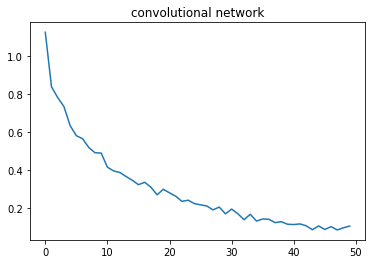

In [30]:
convnet = ConvNet3()
convnet.load_state_dict(pre_tune_state_dict)
convnet.eval()
stl10 = STL10_Dataset(root='/content/drive/My Drive/stl10_binary/', transform = transform_train_stl, train = True)
trainloader_stl = torch.utils.data.DataLoader(stl10, batch_size=6, shuffle=True, num_workers=2)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
losses = finetune(convnet, trainloader_stl, lr = 0.001, epochs = 50, device=device)
tune_state_dict = convnet.state_dict()
plt.plot(losses)
plt.title('convolutional network')
plt.show()

In [31]:
stl10_test = STL10_Dataset(root='/content/drive/My Drive/stl10_binary/', transform = transform_test_stl, train = False)
testloader_stl = torch.utils.data.DataLoader(stl10_test, batch_size=6, shuffle=True, num_workers=2)
valid(convnet,testloader_stl, device=device)

Accuracy of the network on the 10000 test images: 76 %


#### *`Q3.3  Feature Space Visualization`*

In [32]:
# https://www.learnopencv.com/t-sne-for-feature-visualization/


In [40]:
from sklearn.manifold import TSNE
stl10_test = STL10_Dataset(root='/content/drive/My Drive/stl10_binary/', transform = transform_test_stl, train = False)
testloader_stl = torch.utils.data.DataLoader(stl10_test, batch_size=5, shuffle=True, num_workers=2)
pre_tune_net = ConvNet3()
pre_tune_net.load_state_dict(pre_tune_state_dict)
pre_tune_net.eval()
pre_tune_net.to(device)
post_tune_net = convnet
num_ims = 100
outputs1 = None
outputs2 = None
labels = np.array([])
# Compute outputs and labels
for i, data in enumerate(testloader_stl):
  inputs, curr_labels = data
  if device is not None:
    inputs= inputs.to(device)
  curr_outputs1 = pre_tune_net.sub_forward(inputs)
  curr_outputs2 = post_tune_net.sub_forward(inputs)
  labels = np.concatenate((labels, curr_labels.numpy()))
  con1 = curr_outputs1.detach().cpu().numpy()
  con2 = curr_outputs2.detach().cpu().numpy()
  if i==0:
    outputs1 = con1
    outputs2 = con2
  else:
    outputs1 = np.concatenate((outputs1, con1))
    outputs2 = np.concatenate((outputs2, con2))
  
  if i==num_ims:
    print(outputs1.shape)
    break

# Apply t-SNE
tsne1 = TSNE(n_components=2).fit_transform(outputs1)
tsne2 = TSNE(n_components=2).fit_transform(outputs2)
labels = labels.astype(np.uint8)

(505, 16384)


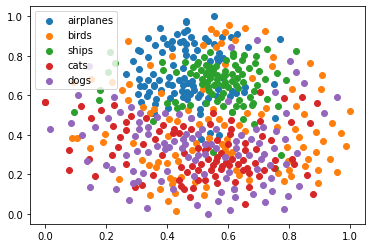

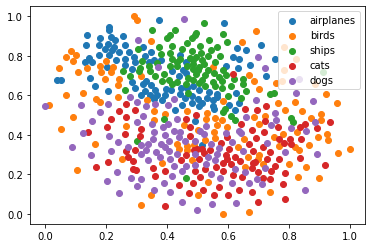

In [41]:
class_labels = ['airplanes','birds','ships','cats','dogs']
def normalize01(x):
  x_max = np.max(x)
  x_min = np.min(x)
  x -= x_min
  return x / (x_max - x_min)

def plot_features(tsne):
  xf = normalize01(tsne[:,0])
  yf = normalize01(tsne[:,1])
  for i in range(max(labels) + 1):
    indices = [index for index, j in enumerate(labels) if j==i]
    class_xf = np.take(xf, indices)
    class_yf = np.take(yf, indices)
    plt.scatter(class_xf, class_yf, label=class_labels[i])
  plt.legend()
  plt.show()

plot_features(tsne1)
plot_features(tsne2)




###  `Bonus`

In [ ]:
pass